# **Python para Modelagem Baseada em Agentes**
**Trabalho Final**

**Professor:** Bernardo Furtado

**Aluno:** Paulo Estevão Alvarenga Martins

#**Introdução:**
Uma empresa quando fecha um contrato com uma outra empresa espera que esse contrato seja cumprido pela outra parte, um funcionário ao vender suas horas de trabalho também gostaria de que suas horas sejam devidamente pagas pela empresa que o contratou e, inclusive, faz dívidas já provisionando o salário que irá chegar. O problema acontece quando ocorre uma crise que penalisa a receita de empresas que não conseguirão honrar suas dívidas e não conseguirão pagar seus funcionários provocando a inadimplência em cadeia.

Esse modelos baseado em agentes irá simular uma crise em um sistema de relacionamento composto por empresas e funcionários. 

#**Pacotes Utilizados**


In [1]:
import random
import pandas as pd
import numpy as np

# **Definindo a Classe Conta**
O primeiro passo para nossa interação é a definição da conta corrente. Essa conta representará o dinheiro que a empresa tem em caixa e o dinheiro que cada um dos funcionários também possui. Dentro da classe *conta* existe a variável *saldo* que seria a variável que armazena o saldo em conta do agente. Para se acrescentar ou retirar valor do saldo, utiliza-se a função *Saldo*.

In [2]:
class Conta:
  
    def __init__(self):
        self.saldo = 0.00

    def Saldo(self, quantia):
        self.saldo += quantia


# **Definindo a Classe Empresa**
A segunda classe a ser criada será a classe Empresa. Cada empresa possui:
*   Uma Conta, relacionada a primeira classe, e Cujo saldo representa o seu caixa.
*   Sua demanda, representando a quantidade de produtos que são produzidos
*   Funcionários e Vagas, representando a quantidade de funcionários empregados e a quantidade de vadas existentes.
*   Salário, representando o salário que é pago aos funcionários de sua empresa.

In [3]:
class Empresa:

    def __init__(self):
        self.conta = Conta()
        self.demanda = 0
        self.funcionarios = 0
        self.vagas = 0
        self.salario = 0

    def Funcionarios (self, quantia):
        self.funcionarios += quantia     
    
    def Vagas (self, quantia):
        self.vagas += quantia  

    def Demanda (self, quantia):
        self.demanda = quantia


# **Definindo a Classe Pessoas Físicas**
A terceira e última classe a ser criada é a classe das pessoas físicas, que seriam os funcionários das empresas. Cada funcionáio possui:
*   Uma Conta, relacionada a primeira classe, Cujo saldo representa a reserva da pessoa.
*   Perfil, indicado 1 para pessoas poupadoras e 2 para pessoas mais gastadoras. 
*   Salário, representando o salário que aquele funcionário recebe quando empregado.

In [4]:
class PF:

  def __init__(self):
    self.conta = Conta()
    self.perfil = 0
    self.salario = 0
    #1 - Controlado, 2 - Gastador
     

# **Testes realizados em cada uma das Classes**



1) Testes na Classe Conta

In [5]:
#testando a classe conta criada
Conta_01 = Conta()
print(Conta_01.saldo)
Conta_01.Saldo(2.22)
print(Conta_01.saldo)

0.0
2.22


2) Teste na classe Empresa

In [6]:
#testando a classe conta criada
demanda = 30
empresa_01 = Empresa()
print(empresa_01.funcionarios)
print(empresa_01.demanda)
empresa_01.Funcionarios(-1)
print(empresa_01.funcionarios)

0
0
-1


3)Testes na Classe Pessoa Física

In [7]:
#testando a classe conta criada
Cliente_01 = PF()
print(Cliente_01.conta.saldo)
Cliente_01.conta.Saldo(10)
print(Cliente_01.conta.saldo)

0.0
10.0


# **Criando Interação**
O nosso primeiro objetivo seria criar uma situação de equilíbrio que possibilite que as empresas, em média, tenham lucro e que os funcionários, em média também tenham uma acumulação de patrimônio. 

Com esse objetivo, empresas são criadas e possuem uma variável para atribuição de todos as suas seus campos. Desse modo, empresas com mais funcionários terão maiores salários e produzirão mais.

As pessoas físicas foram mais aleatórias. Para criação das pessoas físicas atribui-se um valor de saldo em conta corrente superior a mil e inferior a 2000 e um perfil aleatório.

O terceiro passo seria criar a primeira interação, quando pessoas buscam empregos em uma empresa aleatória e oculpam vagas dessas empresas. Caso a empresa procurada não tem vaga, essa pessoa fica sem emprego até encontrar uma outra empresa em uma outra interação.

Por último seria a interação propriamente dita, a empresa recebe o dinheiro de sua venda de mercadoria, cujo valor da mercadoria pode suprir de 95% até 120% das despesas da empresa. Após isso, a empresa paga os seus funcionários, caso a empresa não tenha dinheiro em caixa, ela não paga ninguem. Nessa interação, os funcionários recebem os seus respectivos salários e, caso ainda não tenha emprego, ele tem a chance de procurar emprego em uma empresa aleatória. Se for selecionada uma empresa com vaga, receberá salário na próxima interação.

In [8]:
empresa = list()
pf = list()

In [9]:
def criar_empresa (empresa_max):
    for i in range(empresa_max):
        empresa.append (Empresa()) 
    for i in empresa:
        quantia = random.randint(10, 50)
        i.conta.Saldo((quantia - 10) * 100)
        i.Demanda(quantia * quantia)
        i.Vagas(quantia)
        i.salario = quantia * 100
    
def criar_pf(pf_max):
    for i in range(pf_max):
        pf.append(PF())
    for i in pf:
        i.conta.Saldo(random.randint(1000, 2000))
        i.perfil = random.randint(1, 2)

def Primeira_Interacao():
    #Procura de Emprego
    for p in pf:
        # Escolhe uma empresa aleatoria
        e = random.choice(empresa)
        # Verificar a capacidade
        if e.vagas > 0:
           e.Vagas(-1)
           e.Funcionarios(+1)
           p.salario = e.salario
    

def Interacao(i):
    for e in empresa:
        e.conta.Saldo(e.demanda * random.randint(90, 120) - e.funcionarios * e.salario)
        
    for p in pf:
        # Escolhe uma empresa aleatoria
        e = random.choice(empresa)
        # Verificar a capacidade
        if p.salario == 0 and e.vagas > 0:
          e.Vagas(-1)
          e.Funcionarios(+1)
          p.salario = e.salario
          p.conta.Saldo(-500)
        else:
          if p.perfil == 1 and e.conta.saldo > 0:
            sal = p.salario * 0.20
            p.conta.Saldo(sal)
          elif e.conta.saldo > -5000:
            sal = p.salario * 0.10
            p.conta.Saldo(sal)
          elif p.conta.saldo > -5000:
            p.conta.Saldo(-500)

# **Normalidade (*Base Line*)**
Como as empresas possuem 30 vagas em média, a quantidade de pessoas físicas será 30 vezes a quantidade de empresas. No caso, serão simuladas 30.000 pessoas físicas e 1.000 empresas. 

Após a definião e criação das empresas simulamos 40 interações e foram coletadas em cada uma das interações:

**Informação colegada da Pessoa Física**
*   Saldo em Conta
*   Salário
*   Indicador de Quebrado (Caso o Saldo for inferior a -300)

**Informação da Empresa**
*   Saldo em Conta
*   Salário da Empresa
*   Funcionários
*   Vagas
*   Indicador de Quebrado (Caso o Saldo for inferior a -5.000)

Após análise, essas as informações das pessoas físicas e empresas são colocadas nos arquivos df_pf_norm.csv e df_emp_norm.csv. [texto do link](https://)

In [10]:
criar_empresa (1100)
criar_pf (30000)
Primeira_Interacao()

In [11]:
#Testando Novamente
print(empresa[1].conta.saldo)
print(empresa[1].funcionarios)
print(empresa[1].vagas)
print(empresa[2].conta.saldo)
print(empresa[2].funcionarios)
print(empresa[2].vagas)
print(empresa[3].conta.saldo)
print(empresa[3].funcionarios)
print(empresa[3].vagas)

print(pf[3].conta.saldo)
print(pf[3].perfil)

print(empresa[0].vagas)
print(empresa[1].vagas)
print(empresa[2].vagas)
print(empresa[3].vagas)
print(empresa[4].vagas)
print(empresa[5].vagas)
print(empresa[6].vagas)
print(empresa[7].vagas)
print(empresa[8].vagas)
print(empresa[9].vagas)

3500.0
29
16
300.0
13
0
4000.0
9
41
1944.0
2
1
16
0
41
0
16
16
17
17
19


**Captura de informação e executando a Interação**

In [12]:
def simulacao (a):
    for i in range (a):
        inicial_pf_saldo = []
        inicial_pf_salario = []
        inicial_pf_quebrado = []
        inicial_empresa_saldo = []
        inicial_empresa_salario = []
        inicial_empresa_funcionarios = []
        inicial_empresa_vagas = []
        inicial_empresa_quebrada = []
        id_pf = []
        id_emp = []

        data_pf = []
        data_emp = []

        for p in pf:
          id_pf.append(i)
          inicial_pf_saldo.append(p.conta.saldo)
          inicial_pf_salario.append(p.salario)
          if p.conta.saldo < -500:
            inicial_pf_quebrado.append(1)
          else:
            inicial_pf_quebrado.append(0)

        for e in empresa:
          id_emp.append(i)
          inicial_empresa_saldo.append(e.conta.saldo)
          inicial_empresa_salario.append(e.salario)
          inicial_empresa_funcionarios.append(e.funcionarios)
          inicial_empresa_vagas.append(e.vagas)
          if e.conta.saldo < -5000:
            inicial_empresa_quebrada.append(1)
          else:
            inicial_empresa_quebrada.append(0)

        data_pf = { 'Interacao':id_pf,
                    'PF_Saldo':inicial_pf_saldo, 
                    'PF_Salario':inicial_pf_salario,
                    'PF_Quebrado':inicial_pf_quebrado}

        data_emp = {'Interacao':id_emp,
                    'EMP_Saldo':inicial_empresa_saldo, 
                    'EMP_Salario':inicial_empresa_salario, 
                    'EMP_Funcionarios':inicial_empresa_funcionarios, 
                    'EMP_Vagas':inicial_empresa_vagas,
                    'EMP_Quebrada':inicial_empresa_quebrada}

        if i == 0:
          df_pf = pd.DataFrame(data_pf)
          df_emp = pd.DataFrame(data_emp)
        else:
          df_pf_temp = pd.DataFrame(data_pf)
          df_pf = df_pf.append(df_pf_temp)
          df_emp_temp = pd.DataFrame(data_emp)
          df_emp = df_emp.append(df_emp_temp)

        Interacao(i)  

    print(df_emp.groupby('Interacao')['EMP_Saldo'].mean())
    print(df_emp.groupby('Interacao')['EMP_Quebrada'].sum())

    print(df_pf.groupby('Interacao')['PF_Saldo'].mean())
    print(df_pf.groupby('Interacao')['PF_Quebrado'].sum())

    df_pf_norm = df_pf
    df_emp_norm = df_emp
            
    # Exportando para CSV
    df_pf.to_csv("df_pf_norm.csv")
    df_emp.to_csv("df_emp_norm.csv")

simulacao (40)

Interacao
0       2048.909091
1      39153.261818
2      67347.569091
3      91741.763636
4     114272.662727
5     135697.034545
6     157072.261818
7     177846.021818
8     197644.690909
9     217638.678182
10    237346.210909
11    257129.387273
12    276951.691818
13    296888.879091
14    316935.623636
15    336673.539091
16    356034.105455
17    375220.219091
18    395509.260000
19    415404.871818
20    435159.889091
21    454330.459091
22    474235.175455
23    493563.871818
24    513761.567273
25    533316.918182
26    552832.945455
27    573120.330000
28    592595.677273
29    612249.195455
30    631618.335455
31    651067.230000
32    670522.887273
33    690029.432727
34    710352.488182
35    729795.804545
36    749233.668182
37    769195.100909
38    789031.429091
39    808658.274545
Name: EMP_Saldo, dtype: float64
Interacao
0      0
1      2
2     14
3     15
4     10
5      8
6      8
7      7
8      4
9      1
10     2
11     3
12     3
13     1
14     1
15     0
16  

# **Crise no Preço do Produto**
Após diversas tentantivas para se obter um equilíbrio compatível com a realidade, resolvemos simular uma crise no preço de venda dos produtos quando estivermos nas interações 10, 11 e 12. 

Para isso, o mesmo código será rodado, mas, agora, empresas receberão de 60% até 80% de suas despesas durante o período de crise. Esse fenomeno tende a fazer com que empresas quebrem e, consequentemente, funcionários não recebam seus salários e, também, quebrem ocasionando um colapso na economia analisada. 

Após a definião e criação das empresas simulamos 40 interações e foram coletadas em cada uma das interações:

**Informação colegada da Pessoa Física**
*   Saldo em Conta
*   Salário
*   Indicador de Quebrado (Caso o Saldo for inferior a -300)

**Informação da Empresa**
*   Saldo em Conta
*   Salário da Empresa
*   Funcionários
*   Vagas
*   Indicador de Quebrado (Caso o Saldo for inferior a -5.000)

Após análise, essas as informações das pessoas físicas e empresas são colocadas nos arquivos df_pf_crise.csv e df_emp_crise.csv.

In [13]:
def Interacao(j):
    for e in empresa:
      if j < 10:
        e.conta.Saldo(e.demanda * random.randint(90, 120) - e.funcionarios * e.salario)
      elif j < 13:
        e.conta.Saldo(e.demanda * random.randint(60, 80) - e.funcionarios * e.salario)
      else:
        e.conta.Saldo(e.demanda * random.randint(100, 120) - e.funcionarios * e.salario)
        
    for p in pf:
        # Escolhe uma empresa aleatoria
        e = random.choice(empresa)
        # Verificar a capacidade
        if p.salario == 0 and e.vagas > 0:
          e.Vagas(-1)
          e.Funcionarios(+1)
          p.salario = e.salario
          p.conta.Saldo(-500)
        else:
          if p.perfil == 1 and e.conta.saldo > 0:
            sal = p.salario * 0.20
            p.conta.Saldo(sal)
          elif e.conta.saldo > -5000:
            sal = p.salario * 0.10
            p.conta.Saldo(sal)
          elif p.conta.saldo > -5000:
            p.conta.Saldo(-500)

In [14]:
def simulacao (a):
    for i in range (a):
        inicial_pf_saldo = []
        inicial_pf_salario = []
        inicial_pf_quebrado = []
        inicial_empresa_saldo = []
        inicial_empresa_salario = []
        inicial_empresa_funcionarios = []
        inicial_empresa_vagas = []
        inicial_empresa_quebrada = []
        id_pf = []
        id_emp = []

        data_pf = []
        data_emp = []

        for p in pf:
          id_pf.append(i)
          inicial_pf_saldo.append(p.conta.saldo)
          inicial_pf_salario.append(p.salario)
          if p.conta.saldo < -500:
            inicial_pf_quebrado.append(1)
          else:
            inicial_pf_quebrado.append(0)

        for e in empresa:
          id_emp.append(i)
          inicial_empresa_saldo.append(e.conta.saldo)
          inicial_empresa_salario.append(e.salario)
          inicial_empresa_funcionarios.append(e.funcionarios)
          inicial_empresa_vagas.append(e.vagas)
          if e.conta.saldo < -5000:
            inicial_empresa_quebrada.append(1)
          else:
            inicial_empresa_quebrada.append(0)

        data_pf = { 'Interacao':id_pf,
                    'PF_Saldo':inicial_pf_saldo, 
                    'PF_Salario':inicial_pf_salario,
                    'PF_Quebrado':inicial_pf_quebrado}

        data_emp = {'Interacao':id_emp,
                    'EMP_Saldo':inicial_empresa_saldo, 
                    'EMP_Salario':inicial_empresa_salario, 
                    'EMP_Funcionarios':inicial_empresa_funcionarios, 
                    'EMP_Vagas':inicial_empresa_vagas,
                    'EMP_Quebrada':inicial_empresa_quebrada}

        if i == 0:
          df_pf = pd.DataFrame(data_pf)
          df_emp = pd.DataFrame(data_emp)
        else:
          df_pf_temp = pd.DataFrame(data_pf)
          df_pf = df_pf.append(df_pf_temp)
          df_emp_temp = pd.DataFrame(data_emp)
          df_emp = df_emp.append(df_emp_temp)

        Interacao(i)  

    print(df_emp.groupby('Interacao')['EMP_Saldo'].mean())
    print(df_emp.groupby('Interacao')['EMP_Quebrada'].sum())

    print(df_pf.groupby('Interacao')['PF_Saldo'].mean())
    print(df_pf.groupby('Interacao')['PF_Quebrado'].sum())
            
    # Exportando para CSV
    df_pf_crise = df_pf
    df_emp_crise = df_emp

    df_pf.to_csv("df_pf_crise.csv")
    df_emp.to_csv("df_emp_crise.csv")

simulacao (40)

Interacao
0     8.287037e+05
1     8.487701e+05
2     8.684017e+05
3     8.884390e+05
4     9.074303e+05
5     9.274807e+05
6     9.469068e+05
7     9.671259e+05
8     9.870632e+05
9     1.005804e+06
10    1.025877e+06
11    1.007908e+06
12    9.898954e+05
13    9.717891e+05
14    9.969371e+05
15    1.021743e+06
16    1.046625e+06
17    1.071895e+06
18    1.096947e+06
19    1.121904e+06
20    1.147722e+06
21    1.172269e+06
22    1.196976e+06
23    1.221980e+06
24    1.247157e+06
25    1.271768e+06
26    1.296801e+06
27    1.322137e+06
28    1.347181e+06
29    1.372177e+06
30    1.397141e+06
31    1.422363e+06
32    1.447592e+06
33    1.472220e+06
34    1.496915e+06
35    1.522278e+06
36    1.547321e+06
37    1.572168e+06
38    1.597083e+06
39    1.622366e+06
Name: EMP_Saldo, dtype: float64
Interacao
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    2
14    2
15    2
16    1
17    1
18    1
19    0
20    0
21    0
22    0
23  

In [15]:
empresa = list()
pf = list()
criar_empresa (1100)
criar_pf (30000)
Primeira_Interacao()
simulacao (40)

Interacao
0       1981.363636
1      35430.595455
2      60005.652727
3      82160.345455
4     101906.137273
5     120263.630000
6     137946.353636
7     155004.710909
8     172098.942727
9     188865.313636
10    205559.123636
11    186282.495455
12    166838.396364
13    147410.237273
14    169175.469091
15    190683.150000
16    211943.036364
17    233128.277273
18    253893.957273
19    275451.700909
20    296818.239091
21    318619.317273
22    340253.116364
23    362096.372727
24    383711.670909
25    405756.207273
26    427311.339091
27    449056.415455
28    470689.350000
29    491814.172727
30    513441.479091
31    534688.552727
32    556337.313636
33    578121.455455
34    599811.963636
35    621536.251818
36    643463.541818
37    664997.846364
38    686415.064545
39    707685.262727
Name: EMP_Saldo, dtype: float64
Interacao
0       0
1       7
2      16
3      18
4      10
5      13
6      15
7      11
8       7
9       8
10      6
11     86
12    271
13    544
14    45

# **Crise Alongada no Preço do Produto**
Após diversas tentantivas para se obter um equilíbrio compatível com a realidade, resolvemos simular uma crise no preço de venda dos produtos quando estivermos nas interações 10, 11, 12, 13, 14 e 15. 

Para isso, o mesmo código será rodado, mas, agora, empresas receberão de 60% até 80% de suas despesas durante o período de crise. Esse fenomeno tende a fazer com que empresas quebrem e, consequentemente, funcionários não recebam seus salários e, também, quebrem ocasionando um colapso na economia analisada. 

Após a definião e criação das empresas simulamos 40 interações e foram coletadas em cada uma das interações:

**Informação colegada da Pessoa Física**
*   Saldo em Conta
*   Salário
*   Indicador de Quebrado (Caso o Saldo for inferior a -300)

**Informação da Empresa**
*   Saldo em Conta
*   Salário da Empresa
*   Funcionários
*   Vagas
*   Indicador de Quebrado (Caso o Saldo for inferior a -5.000)

Após análise, essas as informações das pessoas físicas e empresas são colocadas nos arquivos df_pf_crise_2.csv e df_emp_crise_2.csv.

In [16]:
def Interacao(j):
    for e in empresa:
      if j < 10:
        e.conta.Saldo(e.demanda * random.randint(90, 120) - e.funcionarios * e.salario)
      elif j < 15:
        e.conta.Saldo(e.demanda * random.randint(60, 80) - e.funcionarios * e.salario)
      else:
        e.conta.Saldo(e.demanda * random.randint(100, 120) - e.funcionarios * e.salario)
        
    for p in pf:
        # Escolhe uma empresa aleatoria
        e = random.choice(empresa)
        # Verificar a capacidade
        if p.salario == 0 and e.vagas > 0:
          e.Vagas(-1)
          e.Funcionarios(+1)
          p.salario = e.salario
          p.conta.Saldo(-500)
        else:
          if p.perfil == 1 and e.conta.saldo > 0:
            sal = p.salario * 0.20
            p.conta.Saldo(sal)
          elif e.conta.saldo > -5000:
            sal = p.salario * 0.10
            p.conta.Saldo(sal)
          elif p.conta.saldo > -5000:
            p.conta.Saldo(-500)

In [17]:
def simulacao (a):
    for i in range (a):
        inicial_pf_saldo = []
        inicial_pf_salario = []
        inicial_pf_quebrado = []
        inicial_empresa_saldo = []
        inicial_empresa_salario = []
        inicial_empresa_funcionarios = []
        inicial_empresa_vagas = []
        inicial_empresa_quebrada = []
        id_pf = []
        id_emp = []

        data_pf = []
        data_emp = []

        for p in pf:
          id_pf.append(i)
          inicial_pf_saldo.append(p.conta.saldo)
          inicial_pf_salario.append(p.salario)
          if p.conta.saldo < -500:
            inicial_pf_quebrado.append(1)
          else:
            inicial_pf_quebrado.append(0)

        for e in empresa:
          id_emp.append(i)
          inicial_empresa_saldo.append(e.conta.saldo)
          inicial_empresa_salario.append(e.salario)
          inicial_empresa_funcionarios.append(e.funcionarios)
          inicial_empresa_vagas.append(e.vagas)
          if e.conta.saldo < -5000:
            inicial_empresa_quebrada.append(1)
          else:
            inicial_empresa_quebrada.append(0)

        data_pf = { 'Interacao':id_pf,
                    'PF_Saldo':inicial_pf_saldo, 
                    'PF_Salario':inicial_pf_salario,
                    'PF_Quebrado':inicial_pf_quebrado}

        data_emp = {'Interacao':id_emp,
                    'EMP_Saldo':inicial_empresa_saldo, 
                    'EMP_Salario':inicial_empresa_salario, 
                    'EMP_Funcionarios':inicial_empresa_funcionarios, 
                    'EMP_Vagas':inicial_empresa_vagas,
                    'EMP_Quebrada':inicial_empresa_quebrada}

        if i == 0:
          df_pf = pd.DataFrame(data_pf)
          df_emp = pd.DataFrame(data_emp)
        else:
          df_pf_temp = pd.DataFrame(data_pf)
          df_pf = df_pf.append(df_pf_temp)
          df_emp_temp = pd.DataFrame(data_emp)
          df_emp = df_emp.append(df_emp_temp)

        Interacao(i)  

    print(df_emp.groupby('Interacao')['EMP_Saldo'].mean())
    print(df_emp.groupby('Interacao')['EMP_Quebrada'].sum())

    print(df_pf.groupby('Interacao')['PF_Saldo'].mean())
    print(df_pf.groupby('Interacao')['PF_Quebrado'].sum())
            
    # Exportando para CSV
    df_pf_crise = df_pf
    df_emp_crise = df_emp

    df_pf.to_csv("df_pf_crise_2.csv")
    df_emp.to_csv("df_emp_crise_2.csv")

simulacao (40)

Interacao
0     7.293665e+05
1     7.461139e+05
2     7.623662e+05
3     7.789298e+05
4     7.953315e+05
5     8.115498e+05
6     8.280303e+05
7     8.442436e+05
8     8.603333e+05
9     8.765475e+05
10    8.931410e+05
11    8.732970e+05
12    8.535262e+05
13    8.338909e+05
14    8.144335e+05
15    7.948563e+05
16    8.166643e+05
17    8.378291e+05
18    8.594886e+05
19    8.813344e+05
20    9.028878e+05
21    9.243925e+05
22    9.459728e+05
23    9.678021e+05
24    9.894189e+05
25    1.011251e+06
26    1.032806e+06
27    1.054014e+06
28    1.075585e+06
29    1.097341e+06
30    1.118949e+06
31    1.140393e+06
32    1.161908e+06
33    1.183363e+06
34    1.205021e+06
35    1.226698e+06
36    1.248039e+06
37    1.269940e+06
38    1.291611e+06
39    1.313115e+06
Name: EMP_Saldo, dtype: float64
Interacao
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23  

In [18]:
empresa = list()
pf = list()
criar_empresa (1100)
criar_pf (30000)
Primeira_Interacao()
simulacao (40)

Interacao
0       2029.454545
1      37973.160000
2      65768.378182
3      89397.880000
4     110787.937273
5     131641.981818
6     151472.566364
7     171127.210000
8     191254.914545
9     210153.186364
10    228982.726364
11    211010.757273
12    192927.330909
13    174563.350909
14    156174.061818
15    138003.195455
16    162517.910000
17    186435.629091
18    210597.037273
19    234553.281818
20    258523.812727
21    282474.402727
22    306890.814545
23    331355.179091
24    355291.340000
25    379760.804545
26    404010.236364
27    428038.210909
28    452155.606364
29    476093.176364
30    500229.012727
31    524012.643636
32    547754.929091
33    571575.349091
34    596284.426364
35    620120.681818
36    644327.744545
37    668968.620909
38    693217.270909
39    717163.740000
Name: EMP_Saldo, dtype: float64
Interacao
0       0
1       5
2      10
3      14
4      11
5      11
6      11
7       8
8       8
9       6
10      3
11     58
12    231
13    474
14    64

# **Análise do Resultado**
O primeiro passo para análise do resultado seria a leitura dos arquivos criados. Para isso utiliza-se o comando *read_csv* da biblioteca pandas para transformar as bases em datas frames passíveis e análise pelo python.

In [19]:
df_emp_crise_2 = pd.read_csv("df_emp_crise_2.csv")
df_emp_crise = pd.read_csv("df_emp_crise.csv")
df_emp_norm = pd.read_csv("df_emp_norm.csv")

df_pf_crise_2 = pd.read_csv("df_pf_crise_2.csv")
df_pf_crise = pd.read_csv("df_pf_crise.csv")
df_pf_norm = pd.read_csv("df_pf_norm.csv")

# **Análise do Resultado - Empresas**

Na simulação em questão, onde verde seria a situação em normalidade, laranja representa a crise que impacta as interações 10, 11 e 12 e azul seria a crise alongada, é possível reparar que o número de empresas que quebram para o período de crise (crise alongada) sobe rapidamente alcançando um pico em 600 (ou 800 empresas) e retornam a normalidade após a interação 25 (30).

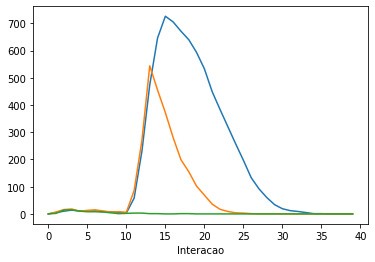

In [20]:
df_emp_crise_2.groupby('Interacao')['EMP_Quebrada'].sum().plot()
df_emp_crise.groupby('Interacao')['EMP_Quebrada'].sum().plot()
df_emp_norm.groupby('Interacao')['EMP_Quebrada'].sum().plot()

# **Análise do Resultado - Pessoas Físicas**

Na simulação em questão, onde verde seria a situação em normalidade, laranja representa a crise que impacta as interações 10, 11 e 12 e azul seria a crise alongada, é possível reparar que o número de pessoas que quebram para o período de crise (crise alongada) sobe rapidamente alcançando um pico em 200 (ou 2000) e até a interação 40 ainda não retornam à normalidade.

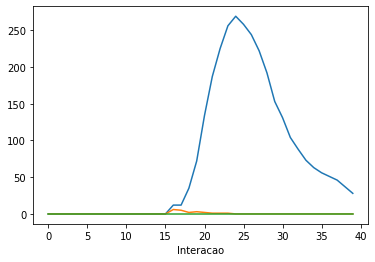

In [21]:
df_pf_crise_2.groupby('Interacao')['PF_Quebrado'].sum().plot()
df_pf_crise.groupby('Interacao')['PF_Quebrado'].sum().plot()
df_pf_norm.groupby('Interacao')['PF_Quebrado'].sum().plot()

Analisando a distribuição dos salários nas tres bases é possível constatar existem mais pessoas físicas com salários próximos de 5.000 e menos pessoas próximo aos salários de 1.000. Quando analisamos as pessoas físicas que estão quebradas, é possível constatar uma inversão nessa distribuição da população, ou seja, as pessoas com menores salários possuem mais probabilidade de quebrar.

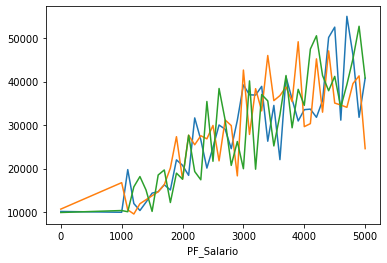

In [22]:
df_pf_crise_2.groupby('PF_Salario')['PF_Quebrado'].count().plot() #Azul
df_pf_crise.groupby('PF_Salario')['PF_Quebrado'].count().plot() #Verde
df_pf_norm.groupby('PF_Salario')['PF_Quebrado'].count().plot() #Laranja

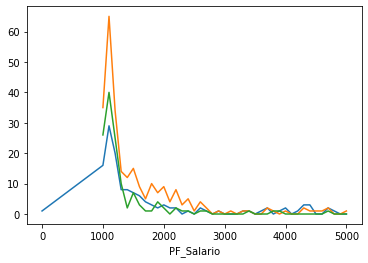

In [23]:
df_pf_crise_2[df_pf_crise_2['Interacao'] == 20].groupby('PF_Salario')['PF_Quebrado'].sum().plot() #Azul
df_pf_crise_2[df_pf_crise_2['Interacao'] == 25].groupby('PF_Salario')['PF_Quebrado'].sum().plot() #Verde
df_pf_crise_2[df_pf_crise_2['Interacao'] == 30].groupby('PF_Salario')['PF_Quebrado'].sum().plot() #Laranja